In [16]:
pip install pandas numpy matplotlib statsmodels pmdarima



     -------------------------------------- 615.0/615.0 kB 3.2 MB/s eta 0:00:00


In [7]:
import pandas as pd

# Load data
df = pd.read_csv(r"C:\Users\koulr\Dropbox\My PC (LAPTOP-5Q1FC4PA)\Downloads\updated_traffic_data (1).csv")

# Display first few rows
print(df.head(5))



           DateTime  Junction  Vehicles           ID DayOfWeek  Hour  \
0  01-11-2015 00:00         1        15  20151101001    Sunday     0   
1  01-11-2015 01:00         1        13  20151101011    Sunday     1   
2  01-11-2015 02:00         1        10  20151101021    Sunday     2   
3  01-11-2015 03:00         1         7  20151101031    Sunday     3   
4  01-11-2015 04:00         1         9  20151101041    Sunday     4   

  TrafficCategory  
0          Medium  
1          Medium  
2          Medium  
3             Low  
4             Low  


In [4]:
import os
print(os.getcwd())  # This prints the current working directory


C:\Users\koulr


In [8]:
print(df.info())  # Check column types
print(df.isnull().sum())  # Check missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   DateTime         48120 non-null  object
 1   Junction         48120 non-null  int64 
 2   Vehicles         48120 non-null  int64 
 3   ID               48120 non-null  int64 
 4   DayOfWeek        48120 non-null  object
 5   Hour             48120 non-null  int64 
 6   TrafficCategory  48120 non-null  object
dtypes: int64(4), object(3)
memory usage: 2.6+ MB
None
DateTime           0
Junction           0
Vehicles           0
ID                 0
DayOfWeek          0
Hour               0
TrafficCategory    0
dtype: int64


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima



In [19]:
# Load the dataset
df = pd.read_csv(r"C:\Users\koulr\Dropbox\My PC (LAPTOP-5Q1FC4PA)\Downloads\updated_traffic_data (1).csv")

# Convert DateTime column to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Set DateTime as the index
df.set_index('DateTime', inplace=True)

# Aggregate traffic data at daily level
df_daily = df.resample('D').sum()


In [20]:
#Check for Stationarity
#Before applying ARIMA, we must check if the data is stationary using the Augmented Dickey-Fuller (ADF) test.
# Perform Augmented Dickey-Fuller test
adf_test = adfuller(df_daily['Vehicles'])

# Extract results
adf_statistic = adf_test[0]
p_value = adf_test[1]

print(f"ADF Statistic: {adf_statistic}")
print(f"p-value: {p_value}")


ADF Statistic: -3.6234211296848455
p-value: 0.005328733275746765


In [21]:
 #Make Data Stationary (If Needed)
# If the data isn't stationary, apply first-order differencing.
df_daily['Vehicles_diff'] = df_daily['Vehicles'].diff()

# Perform ADF test again
adf_test_diff = adfuller(df_daily['Vehicles_diff'].dropna())

print(f"New ADF Statistic: {adf_test_diff[0]}")
print(f"New p-value: {adf_test_diff[1]}")


New ADF Statistic: -11.109056227525501
New p-value: 3.6994128839314397e-20


In [22]:

#Step 5: Identify ARIMA Parameters (p, d, q)
#We use Auto ARIMA to determine the best (p, d, q) values.

auto_arima_model = auto_arima(df_daily['Vehicles'], seasonal=False, trace=True)
auto_arima_model.order


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.72 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16295.293, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16282.028, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16277.246, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16293.317, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=16187.863, Time=0.67 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=16189.825, Time=1.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=16189.823, Time=1.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=16262.491, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=16266.570, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=16186.112, Time=0.34 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=16275.273, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=16280.058, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=16188.071, Time=0.67 sec
 ARIMA(1,1,2)(0,0,0)[0]  

(1, 1, 1)

In [23]:
# Build and Train ARIMA Model
#Now, we train the ARIMA model with the best (p, d, q) values found.
# Example: If Auto ARIMA suggests (2,1,2)
arima_model = ARIMA(df_daily['Vehicles'], order=(2,1,2))
arima_result = arima_model.fit()

# Display Model Summary
print(arima_result.summary())


C:\Users\koulr\anaconda3\ananconda_ds\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:               Vehicles   No. Observations:                 1061
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -8088.818
Date:                Sun, 09 Mar 2025   AIC                          16187.636
Time:                        00:00:34   BIC                          16212.466
Sample:                    01-11-2015   HQIC                         16197.046
                         - 12-06-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2417      0.021    -11.439      0.000      -0.283      -0.200
ar.L2          0.7429      0.019     38.781      0.000       0.705       0.780
ma.L1          0.0257      0.291      0.088      0.9

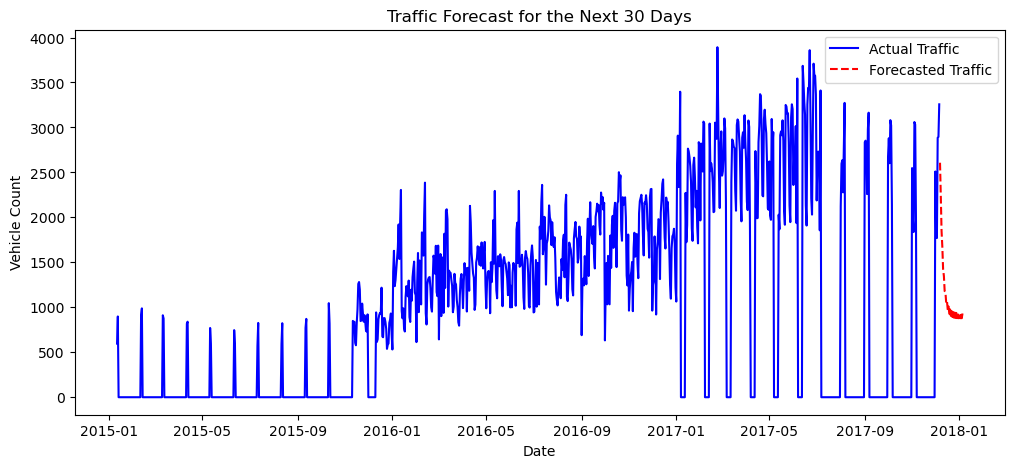

In [24]:
# forecast for next 30 days

forecast_steps = 30
forecast = arima_result.forecast(steps=forecast_steps)

# Create date range for forecast
forecast_dates = pd.date_range(start=df_daily.index[-1], periods=forecast_steps + 1, freq='D')[1:]

# Plot Actual vs Forecasted Traffic
plt.figure(figsize=(12, 5))
plt.plot(df_daily.index, df_daily['Vehicles'], label="Actual Traffic", color='blue')
plt.plot(forecast_dates, forecast, label="Forecasted Traffic", color='red', linestyle='dashed')
plt.title("Traffic Forecast for the Next 30 Days")
plt.xlabel("Date")
plt.ylabel("Vehicle Count")
plt.legend()
plt.show()
